## IS FANDANGO APPROPRIATING MOVIE RATINGS TO FURTHUR THEIR BIZ ???##


Entertainment comes in mutliple forms, it can be clubbing, watching your fav show on the television or hanging out with your peers but nothing defines entertainment quite like watching a movie in the cinema like its supposed  be watched.And arriving at a decision on what movie to go to can be pretty dicey.Thats where applications like ``IMDB,
Rotten tomatoe or fandango`` come into picture.

But when the same assistants like fandango appropriate their movie ratings to persuade customers to buy tickets for a purticular movie,thats not something that can be overlooked. Fandangos ratings are rounded off to the nearest half star. the value of ratings in the html file is off by 0.5.

In this project we'll work towards figuring out if fandango is still providing inaccurate movie ratings. We'll be combining the power of analytics and data to achieve our goal.

In [1]:
## Importing essential modules ##


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas import DataFrame as df
from pandas import Series as sr
%matplotlib inline


In [2]:
## reading in the required data ##

pd.options.display.max_columns = 100
now = pd.read_csv("Desktop/movie_ratings_16_17.csv")
previous = pd.read_csv("Desktop/fandango_score_comparison.csv")

In [3]:
now.head(10)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0
5,A Monster Calls,2016,76,7.5,87,84,4.0,3.80,3.75,4.35,4.20,4.0,4.0,4.5,4.0
6,A Street Cat Named Bob,2016,54,7.4,77,79,4.5,2.70,3.70,3.85,3.95,2.5,3.5,4.0,4.0
7,Alice Through the Looking Glass,2016,34,6.2,30,50,4.0,1.70,3.10,1.50,2.50,1.5,3.0,1.5,2.5
8,Allied,2016,60,7.1,61,66,4.0,3.00,3.55,3.05,3.30,3.0,3.5,3.0,3.5
9,Amateur Night,2016,38,5.0,0,27,3.5,1.90,2.50,0.00,1.35,2.0,2.5,0.0,1.5


In [4]:
previous

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,4.0,4.0,4.35,3.90,3.35,3.95,3.70,4.5,4.0,3.5,4.0,3.5,33,7367,1348,0.0
142,'71 (2015),97,82,83,7.5,7.2,3.5,3.5,4.85,4.10,4.15,3.75,3.60,5.0,4.0,4.0,4.0,3.5,60,24116,192,0.0
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,3.5,3.5,4.85,3.90,4.45,4.40,3.70,5.0,4.0,4.5,4.5,3.5,123,24345,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,3.5,3.5,5.00,4.05,4.50,3.65,3.90,5.0,4.0,4.5,3.5,4.0,19,1955,59,0.0


In [5]:
## isolating data pertaining to only fandango,this data might come in handy in analysing fandango specific ratings ##

fandango_now = now[['movie','year','fandango']].copy()
fandango_previous = previous[['FILM','Fandango_Stars', 'Fandango_Ratingvalue','Fandango_votes','Fandango_Difference']].copy()

Our goal is to indentify if fandango is still inflating their ratings after hickey's analysis.Because we are intrested in determining if the ratings have changed after hickey's analysis, we have divided the data into 2 halfs

1. Previous i.e data before hickey's analysis
2. now i.e data after hickey's analysis

The data collected by hickey contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

But there are conditions placed on the data,like
1. The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
2. The movie must have had tickets on sale in 2015.

the sampling performed by hickey is clearly not random as not every movie has an equal likelyhood of appearing in the sample.This kind of sampling is purposive sampling or selective sampling.

The data in the first dataset seems to contain movies with 30 or more fandango ratings and from the year ``2015``.
On the contrary the data from the second dataset contains data from ``2016 or later``.

## Changing the goal of our analysis ##

At this point we can change our goal of analysis.We can compare rating data between ``2015 and 2016 or later`` as the data in the 2 datasets is divied likewise.


In [6]:
fandango_now.sample(20, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


The sampling seems fair enough as almost all(90 %) of the movies above are popular.

lets also double checkthat all the movies have atleast 30+ ratings


In [7]:
sum(fandango_previous['Fandango_votes'] < 30)

## confimed ##


0

Now, per our change of goal, lets isolate movies into 2 categories
1. 2015
2. 2016

the year in which the movie was released was not explicitly mentioned in the fandango_previous ds so we'd have to filter that little details out from the ``FILM`` column.


In [8]:
fandango_previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5


In [9]:
fandango_previous['Year'] = fandango_previous['FILM'].str[-5:-1]

In [10]:
## checks to see if the filter worked ##

fandango_previous.head(2)
fandango_previous[fandango_previous["Year"] == '2015']

## it does ##

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015
...,...,...,...,...,...,...
140,Inside Out (2015),4.5,4.5,15749,0.0,2015
141,Mr. Holmes (2015),4.0,4.0,1348,0.0,2015
142,'71 (2015),3.5,3.5,192,0.0,2015
144,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0,2015


In [11]:
## now lets filter out 2015 and 2016 films into 2 sections

fandango_2015 = fandango_previous[fandango_previous["Year"] == "2015"].copy()

fandango_2015["Year"].value_counts()

2015    129
Name: Year, dtype: int64

In [12]:
fandango_2016 = fandango_now[fandango_now["year"] == 2016].copy()


fandango_2016["year"].value_counts()

2016    191
Name: year, dtype: int64

Text(0.5, 0, 'Stars')

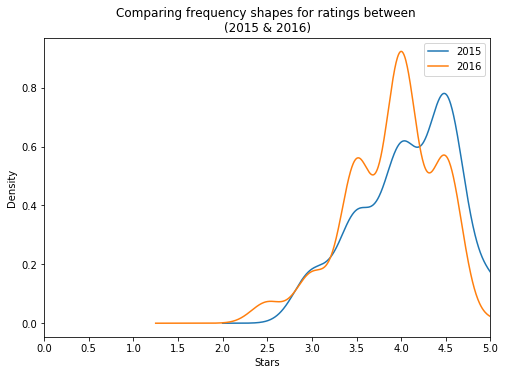

In [13]:
fandango_2015["Fandango_Stars"].plot.kde(label = "2015", legend = True, figsize = (8,5.5))
fandango_2016["fandango"].plot.kde(label = "2016", legend = True)
plt.title("Comparing frequency shapes for ratings between \n(2015 & 2016)")
plt.xlim(0,5)
plt.xticks(np.arange(0,5.1,.5))
plt.xlabel("Stars")





The shape of both ``2015`` and ``2016`` is left skewed i.e the ratings are skewed to the higher end(above 4.0). But the ratings of ``2016`` are lower than the that of ``2015`` at the higher end(above 4.0).This suggests that there was a difference indeed between Fandango's ratings for popular movies in ``2015`` and Fandango's ratings for popular movies in ``2016``.

## Comparing relative frequencies of the two distributions ##

Now let's compare the relative frequencies of the two distributions to precisely determine if the ratings in ``2016`` have lowered compared to ``2015``. Because the two datasets have different number of movies, lets normalize the datasets and show our results in percentages.



In [18]:
print("2015" + "\n" + "-----------------")
fandango_2015["Fandango_Stars"].value_counts(normalize = True).sort_index() * 100


2015
-----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [19]:
print("2016" + "\n" + "-----------------")
fandango_2016["fandango"].value_counts(normalize = True).sort_index() * 100

2016
-----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016, the higher end(4.5 and above) had significantly lower percentages compared to 2015.ANd also it can be inferred from the results above that the cutoff for rating in 2016 is lower(2.5) Than the cutoff for 2016(3.0).
But some ratings(3.5,4.0) revceived higher percentages than 2015 which challenges the direction of change in  distribution of the ratings we observed in the kde plot.

## Figuring out the direction of change in distribution ##

Finally, lets determine the direction of change using summary statistics like mean,median and mode

In [57]:
## mean for 2015 and 2016 ##
mean_2015 = fandango_2015["Fandango_Stars"].mean()
mean_2016 = fandango_2016["fandango"].mean()

## median for 2015 and 2016 ##
median_2015 = fandango_2015["Fandango_Stars"].median()
median_2016 = fandango_2016["fandango"].median()

## mode for 2015 and 2016 ##
mode_2015 = fandango_2015["Fandango_Stars"].mode()[0]
mode_2016 = fandango_2016["fandango"].mode()[0]

summary = pd.DataFrame()

summary["2015"] = [mean_2015,median_2015,mode_2015]
summary["2016"] = [mean_2016,median_2016,mode_2016]
summary.index = ["mean","median","mode"]

print(summary)

            2015      2016
mean    4.085271  3.887435
median  4.000000  4.000000
mode    4.500000  4.000000


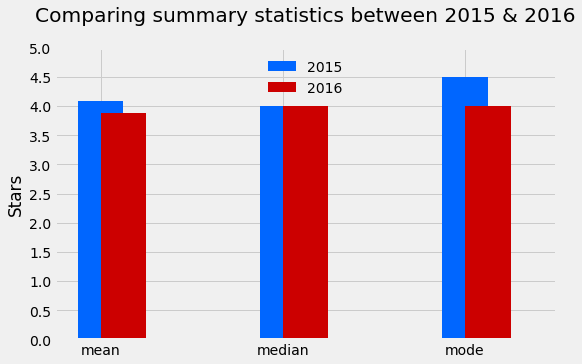

In [55]:
plt.style.use("fivethirtyeight")

summary["2015"].plot.bar(color = '#0066FF', align = 'center', label = "2015", width = .25)
summary["2016"].plot.bar(color = '#CC0000', align = 'edge', label = "2016", width = .25,
                         rot = 0, figsize = (8,5))

plt.title("Comparing summary statistics between 2015 & 2016", y = 1.07)

plt.legend(framealpha = 0, loc = 'upper center')
plt.ylim(0,5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars')
plt.show()

The mean in 2016 is lower in 2016 by 0.2 appox. the mode is also lower in 2016(4.0) compared to 2016(4.5)

## Conclusion ##

It is safe to assume based the anamolies of the 2 distributions that the ratings in 2016 have indeed decreased albiet marginally from 2015. The exact reason for the change is unknown but if i were a betting man, i'd put my money on Hikley's Analysis. He may have triggered the change in the biased rating system.